# <span style=color:yellow;>Timbre: Piano vs. Violin</span>

# Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from IPython.display import Audio

In [2]:
# Import custom audio module
from audio_visualization import *
print(f"Using audio_visualization module v{MODULE_VERSION}")  # Ensure ≥10.0

Using audio_visualization module v4.0


In [3]:
# Configure plotting
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")

# Step 2: What is Timbre?

- `Timbre` is the unique "`tone color`" of a sound that allows us to distinguish between instruments
    - —even when they play the same pitch at the same loudness. 

- For example, a `piano` and `violin` playing `A4 (440 Hz)` sound distinct because of differences in:
    - `Harmonic structure` (strength of overtones)
    - `Amplitude envelopes` (how volume changes over time)

<div style='text-align:center'>
    <img src='Image/Timbre.webp' width=250>
</div>

# Step 3: Harmonic Structure

## Step 3.1: Define fundamental frequency
$$ A4 = 440 Hz$$

In [4]:
fundamental = 440  # Hz
duration = 2  # Seconds
sample_rate = DEFAULT_SAMPLE_RATE
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
time_segment = create_time_segment(t, end_time=0.1)  # For time-domain plots

## Step 3.2: Define instrument-specific harmonic profiles

In [5]:
# Harmonic strength 
# relative to fundamental, 1x to 10x multiples
piano_harmonics = [1.0, 0.7, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.1, 0.08]  # Warmer
violin_harmonics = [1.0, 0.8, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2]  # Brighter

In [6]:
# Calculate harmonic frequencies
harmonic_multiples = np.arange(1, 11)
print("Harmonic multiples (relative to fundamental frequency):")
print(harmonic_multiples)

Harmonic multiples (relative to fundamental frequency):
[ 1  2  3  4  5  6  7  8  9 10]


In [7]:
harmonic_frequencies = harmonic_multiples * fundamental
print("Harmonic frequencies for A4 (fundamental = 440 Hz):")
print("-----------------------------------------------")
for i, (multiple, freq) in enumerate(zip(harmonic_multiples, harmonic_frequencies), 1):
    print(f"Harmonic {i:2d}: {multiple}× fundamental = {freq:4d} Hz")

Harmonic frequencies for A4 (fundamental = 440 Hz):
-----------------------------------------------
Harmonic  1: 1× fundamental =  440 Hz
Harmonic  2: 2× fundamental =  880 Hz
Harmonic  3: 3× fundamental = 1320 Hz
Harmonic  4: 4× fundamental = 1760 Hz
Harmonic  5: 5× fundamental = 2200 Hz
Harmonic  6: 6× fundamental = 2640 Hz
Harmonic  7: 7× fundamental = 3080 Hz
Harmonic  8: 8× fundamental = 3520 Hz
Harmonic  9: 9× fundamental = 3960 Hz
Harmonic 10: 10× fundamental = 4400 Hz


## Step 3.3: Plot harmonic profiles

In [8]:
plt.ioff()
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

In [9]:
plt.plot(harmonic_frequencies, piano_harmonics, 'o-', label='Piano', color='darkblue')
plt.plot(harmonic_frequencies, violin_harmonics, 's-', label='Violin', color='darkred')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Harmonic Strength (Relative to Fundamental)')

Text(0, 0.5, 'Harmonic Strength (Relative to Fundamental)')

In [10]:
plt.title('Harmonic Profiles: Piano vs. Violin (A4 = 440 Hz)')
plt.axvline(x=fundamental, color='gray', linestyle='--', label='Fundamental (440 Hz)')

In [11]:
plt.xlim(0, 4500)
plt.legend()

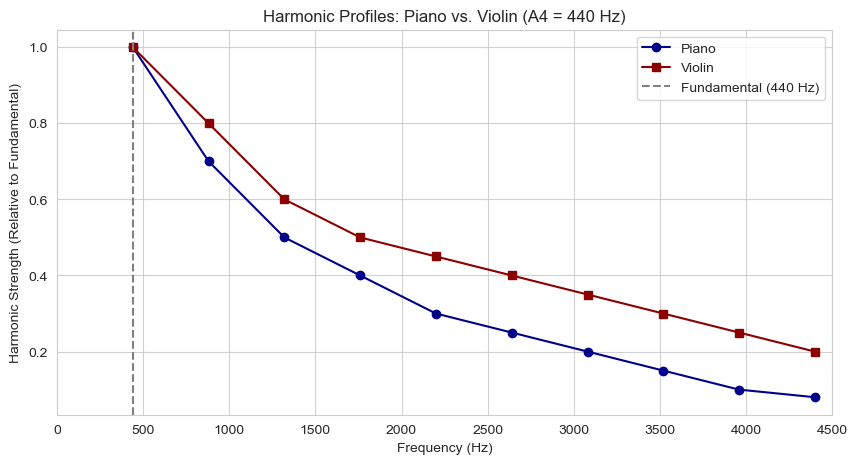

In [12]:
plt.grid(alpha=0.9)
plt.show()

# Step 4: Amplitude Envelopes (ADSR)

In [13]:
# Generate normalized time array (0 to 1)
time = np.linspace(0, 1, 1000)

## Step 4.1: Piano envelope: Fast attack, quick decay

In [14]:
piano_attack = np.where(time < 0.05, time/0.05, 1)  # 50ms attack
piano_decay = np.where(time < 0.2, 1 - 0.3*(time-0.05)/0.15, 0.7)  # Decay to 70%
piano_sustain = 0.7 * np.ones_like(time)
piano_release = np.where(time > 0.8, 0.7 - 0.7*(time-0.8)/0.2, 1)  # 200ms release
piano_envelope = piano_attack * piano_decay * piano_sustain * piano_release

## Step 4.2: Violin envelope: Gradual attack, slow decay

In [15]:
violin_attack = np.where(time < 0.2, time/0.2, 1)  # 200ms attack
violin_decay = np.where(time < 0.5, 1 - 0.2*(time-0.2)/0.3, 0.8)  # Decay to 80%
violin_sustain = 0.8 * np.ones_like(time)
violin_release = np.where(time > 0.7, 0.8 - 0.8*(time-0.7)/0.3, 1)  # 300ms release
violin_envelope = violin_attack * violin_decay * violin_sustain * violin_release

## Step 4.3: Plot ADSR envelopes

In [16]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

In [17]:
plt.plot(time, piano_envelope, label='Piano', color='darkblue')
plt.plot(time, violin_envelope, label='Violin', color='darkred')

In [18]:
plt.xlabel('Time (Normalized)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

In [19]:
plt.title('ADSR Envelopes: Piano vs. Violin')

Text(0.5, 1.0, 'ADSR Envelopes: Piano vs. Violin')

In [20]:
plt.legend()

In [21]:
plt.grid(alpha=0.9)

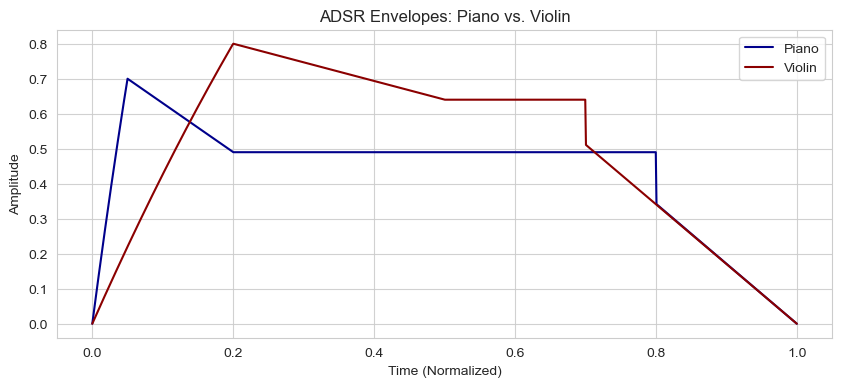

In [22]:
plt.show()

# Step 5: Takeaway

<div style='background-color: #0f172a; padding: 25px; border-radius: 12px; box-shadow: 0 4px 15px rgba(0,0,0,0.3); color: #e2e8f0;'>
<h3 style='color: #38bdf8; text-align: center; margin-top: 0; font-size: 22px; text-shadow: 0 0 8px rgba(56, 189, 248, 0.5);'>Timbre Showdown: Piano vs. Violin</h3>

<table style='width: 100%; border-collapse: collapse; margin: 25px 0; border: 1px solid #1e293b;'>
<thead>
<tr style='background: linear-gradient(90deg, #1e40af, #3b82f6); color: white;'>
<th style='padding: 15px; text-align: left; border-bottom: 3px solid #60a5fa; font-size: 16px;'>Characteristic</th>
<th style='padding: 15px; text-align: left; border-bottom: 3px solid #60a5fa; font-size: 16px;'>Piano 🎹</th>
<th style='padding: 15px; text-align: left; border-bottom: 3px solid #60a5fa; font-size: 16px;'>Violin 🎻</th>
</tr>
</thead>
<tbody>
<tr style='background-color: #1e293b;'>
<td style='padding: 15px; border-bottom: 1px solid #334155; font-weight: bold; color: #fcd34d;'>Harmonic Structure</td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Weak higher harmonics (6×+ multiples)<br><span style='color: #94a3b8; font-size: 12px;'>(Warm, rounded tone)</span></td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Strong higher harmonics (up to 10× multiples)<br><span style='color: #94a3b8; font-size: 12px;'>(Bright, piercing tone)</span></td>
</tr>
<tr style='background-color: #1e293b;'>
<td style='padding: 15px; border-bottom: 1px solid #334155; font-weight: bold; color: #fcd34d;'>Attack Time</td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Instant (< 0.1s)<br><span style='color: #ef4444;'>⚡ Hammer strikes string</span></td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Gradual (~0.4s)<br><span style='color: #22c55e;'>🎻 Bow pulls string slowly</span></td>
</tr>
<tr style='background-color: #1e293b;'>
<td style='padding: 15px; border-bottom: 1px solid #334155; font-weight: bold; color: #fcd34d;'>Sustain Behavior</td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Rapid decay<br><span style='color: #94a3b8;'>Energy fades after initial strike</span></td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Continuous resonance<br><span style='color: #94a3b8;'>Bow maintains vibration</span></td>
</tr>
<tr style='background-color: #1e293b;'>
<td style='padding: 15px; border-bottom: 1px solid #334155; font-weight: bold; color: #fcd34d;'>Release Profile</td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Abrupt cut-off<br><span style='color: #ef4444;'>Damper silences string immediately</span></td>
<td style='padding: 15px; border-bottom: 1px solid #334155; background-color: #0f172a;'>Smooth fade-out<br><span style='color: #22c55e;'>Bow gradually lifted from string</span></td>
</tr>
<tr style='background-color: #1e293b;'>
<td style='padding: 15px; font-weight: bold; color: #fcd34d;'>Musical Strength</td>
<td style='padding: 15px; background-color: #0f172a; border: 2px solid #3b82f6;'>Rhythmic precision & staccato passages<br><span style='font-style: italic;'>e.g., Ragtime, Classical sonatas</span></td>
<td style='padding: 15px; background-color: #0f172a; border: 2px solid #ec4899;'>Expressive legato & emotional phrasing<br><span style='font-style: italic;'>e.g., Romantic concertos, film scores</span></td>
</tr>
</tbody>
</table>

<div style='background: linear-gradient(135deg, #1e3a8a 0%, #3b82f6 100%); padding: 15px; border-radius: 8px; border-left: 4px solid #fcd34d;'>
<p style='margin: 0; font-size: 15px; line-height: 1.6;'>
<strong style='color: white;'>Core Insight:</strong> Timbre is created by the unique 'fingerprint' of harmonics and envelope shape. Pianos act like <strong>acoustic percussion</strong> (instant energy spike), while violins behave like <strong>sustained vibrators</strong> (gradual energy flow). This is why a piano can cut through an orchestra with staccato chords, while a violin can sing with seamless melodies.
</p>
</div>
</div>